 # Time Series

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## date and time data types and tools

In [4]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2016, 8, 16, 6, 55, 5, 730000)

In [5]:
now.year, now.month, now.day

(2016, 8, 16)

In [7]:
delta = datetime(2016,1,7) - datetime(2013,6,24,8,15)
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [11]:
from datetime import timedelta
start = datetime(2016,8,16)

In [12]:
start + timedelta(12)

datetime.datetime(2016, 8, 28, 0, 0)

In [13]:
start - 2 * timedelta(12)

datetime.datetime(2016, 7, 23, 0, 0)

### converting between string and datetime

In [14]:
stamp = datetime(2016,8,16)
str(stamp)

'2016-08-16 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2016-08-16'

In [18]:
nilai = '2016-08-16'
datetime.strptime(nilai,'%Y-%m-%d')

datetime.datetime(2016, 8, 16, 0, 0)

In [21]:
tanggals = ['16/8/2016','17/8/2016']
[datetime.strptime(x, '%d/%m/%Y') for x in tanggals]

[datetime.datetime(2016, 8, 16, 0, 0), datetime.datetime(2016, 8, 17, 0, 0)]

In [22]:
from dateutil.parser import parse
parse('2016-08-16')

datetime.datetime(2016, 8, 16, 0, 0)

In [23]:
parse('Aug 16, 2016 10:01 AM')

datetime.datetime(2016, 8, 16, 10, 1)

In [24]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [27]:
tanggals

['16/8/2016', '17/8/2016']

In [28]:
pd.to_datetime(tanggals)

DatetimeIndex(['2016-08-16', '2016-08-17'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(tanggals + [None])
idx

DatetimeIndex(['2016-08-16', '2016-08-17', 'NaT'], dtype='datetime64[ns]', freq=None)

In [33]:
idx[2]

NaT

In [34]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## Time Series Basics

In [38]:
from datetime import datetime
tanggalan = [datetime(2016,8,1),datetime(2016,9,1),datetime(2016,10,1),datetime(2016,11,1),datetime(2016,12,1),datetime(2017,1,1)]
ts = Series(np.random.randn(6), index=tanggalan)
ts

2016-08-01    1.121784
2016-09-01    0.535058
2016-10-01    0.849968
2016-11-01    1.342583
2016-12-01   -0.769820
2017-01-01   -2.139312
dtype: float64

In [39]:
type(ts)

pandas.core.series.Series

In [40]:
ts.index

DatetimeIndex(['2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', freq=None)

In [41]:
ts + ts[::2]

2016-08-01    2.243568
2016-09-01         NaN
2016-10-01    1.699936
2016-11-01         NaN
2016-12-01   -1.539641
2017-01-01         NaN
dtype: float64

In [42]:
ts.index.dtype

dtype('<M8[ns]')

In [43]:
stamp = ts.index[0]
stamp

Timestamp('2016-08-01 00:00:00')

### Indexing, Selection, Subsetting

In [44]:
stamp = ts.index[2]
ts[stamp]

0.84996813480845168

In [47]:
ts['08/1/2016']

1.1217840724402997

In [48]:
ts['20160801']

1.1217840724402997

In [49]:
longer_ts = Series(np.random.randn(1000), index = pd.date_range('1/1/2016', periods=1000))
longer_ts

2016-01-01   -1.571212
2016-01-02    1.595778
2016-01-03   -0.141183
2016-01-04   -0.444006
2016-01-05   -0.266286
2016-01-06    0.448001
                ...   
2018-09-21    1.856681
2018-09-22    0.300102
2018-09-23    0.448725
2018-09-24   -1.686888
2018-09-25    0.746326
2018-09-26   -0.346059
Freq: D, dtype: float64

In [53]:
longer_ts['2016']

2016-01-01   -1.571212
2016-01-02    1.595778
2016-01-03   -0.141183
2016-01-04   -0.444006
2016-01-05   -0.266286
2016-01-06    0.448001
                ...   
2016-12-26    0.673427
2016-12-27   -1.404844
2016-12-28   -0.133985
2016-12-29    1.198722
2016-12-30   -1.039654
2016-12-31    0.168623
Freq: D, dtype: float64

In [54]:
longer_ts['2016-08']

2016-08-01    0.749028
2016-08-02   -1.361208
2016-08-03   -0.120036
2016-08-04   -0.016864
2016-08-05   -0.338114
2016-08-06    0.344441
                ...   
2016-08-26    0.864253
2016-08-27   -0.385816
2016-08-28   -0.601210
2016-08-29    0.675325
2016-08-30   -0.102167
2016-08-31    0.028973
Freq: D, dtype: float64

In [57]:
ts[datetime(2016,5,7):]

2016-08-01    1.121784
2016-09-01    0.535058
2016-10-01    0.849968
2016-11-01    1.342583
2016-12-01   -0.769820
2017-01-01   -2.139312
dtype: float64

In [62]:
ts

2016-08-01    1.121784
2016-09-01    0.535058
2016-10-01    0.849968
2016-11-01    1.342583
2016-12-01   -0.769820
2017-01-01   -2.139312
dtype: float64

In [63]:
ts['8/1/2016':'10/1/2016']

2016-08-01    1.121784
2016-09-01    0.535058
2016-10-01    0.849968
dtype: float64

In [64]:
ts.truncate(after='12/1/2016')

2016-08-01    1.121784
2016-09-01    0.535058
2016-10-01    0.849968
2016-11-01    1.342583
2016-12-01   -0.769820
dtype: float64

In [67]:
dates = pd.date_range('1/1/2016', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100,4), index=dates, 
                    columns=['Semarang','Solo','Jogja','Pekalongan'])
long_df.ix['4-2016']

,Semarang,Solo,Jogja,Pekalongan
2016-04-06,0.712269,-0.413931,-0.940437,0.406203
2016-04-13,-1.028293,-0.072041,-0.347863,-0.143583
2016-04-20,-0.694311,-0.101861,0.256828,-1.850428
2016-04-27,-0.828983,1.916305,-0.269439,0.909759


### time series with duplicate indices

In [85]:
#tanggalan.append(datetime(2016,12,1))
tanggalan

[datetime.datetime(2016, 8, 1, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 10, 1, 0, 0),
 datetime.datetime(2016, 11, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0)]

In [86]:
dup_ts = Series(np.arange(11), index=tanggalan)
dup_ts

2016-08-01     0
2016-09-01     1
2016-10-01     2
2016-11-01     3
2016-12-01     4
2017-01-01     5
2016-09-01     6
2016-09-01     7
2016-12-01     8
2016-12-01     9
2016-12-01    10
dtype: int32

In [87]:
dup_ts.index.is_unique

False

In [88]:
dup_ts['8/1/2016'] # not duplicated? yes it is not

2016-08-01    0
dtype: int32

In [89]:
dup_ts['9/1/2016'] # duplicated? yes it is

2016-09-01    1
2016-09-01    6
2016-09-01    7
dtype: int32

In [90]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2016-08-01    0.000000
2016-09-01    4.666667
2016-10-01    2.000000
2016-11-01    3.000000
2016-12-01    7.750000
2017-01-01    5.000000
dtype: float64

In [91]:
grouped.count()

2016-08-01    1
2016-09-01    3
2016-10-01    1
2016-11-01    1
2016-12-01    4
2017-01-01    1
dtype: int64

## Date Ranges, Frequencies and Shifting

In [92]:
ts

2016-08-01    2.726958
2016-09-01    2.140232
2016-10-01    2.455142
2016-11-01    2.947757
2016-12-01    0.835354
2017-01-01   -0.534138
dtype: float64

In [96]:
ts['8/1/2016':'9/1/2016'].resample('D').mean()

2016-08-01    2.726958
2016-08-02         NaN
2016-08-03         NaN
2016-08-04         NaN
2016-08-05         NaN
2016-08-06         NaN
                ...   
2016-08-27         NaN
2016-08-28         NaN
2016-08-29         NaN
2016-08-30         NaN
2016-08-31         NaN
2016-09-01    2.140232
Freq: D, dtype: float64

### Generating Date Ranges

In [97]:
index = pd.date_range('8/1/2016','9/1/2016')
index

DatetimeIndex(['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-06', '2016-08-07', '2016-08-08',
               '2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12',
               '2016-08-13', '2016-08-14', '2016-08-15', '2016-08-16',
               '2016-08-17', '2016-08-18', '2016-08-19', '2016-08-20',
               '2016-08-21', '2016-08-22', '2016-08-23', '2016-08-24',
               '2016-08-25', '2016-08-26', '2016-08-27', '2016-08-28',
               '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01'],
              dtype='datetime64[ns]', freq='D')

In [100]:
pd.date_range(start='8/1/2016',periods =15)

DatetimeIndex(['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-06', '2016-08-07', '2016-08-08',
               '2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12',
               '2016-08-13', '2016-08-14', '2016-08-15'],
              dtype='datetime64[ns]', freq='D')

In [101]:
pd.date_range(end='8/16/2016', periods=20)

DatetimeIndex(['2016-07-28', '2016-07-29', '2016-07-30', '2016-07-31',
               '2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-06', '2016-08-07', '2016-08-08',
               '2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12',
               '2016-08-13', '2016-08-14', '2016-08-15', '2016-08-16'],
              dtype='datetime64[ns]', freq='D')

In [102]:
pd.date_range('8/1/2016','12/1/2016',freq='BM')

DatetimeIndex(['2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30'], dtype='datetime64[ns]', freq='BM')

In [103]:
pd.date_range('8/16/2016 11:27:32',periods=5, normalize=True)

DatetimeIndex(['2016-08-16', '2016-08-17', '2016-08-18', '2016-08-19',
               '2016-08-20'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [104]:
from pandas.tseries.offsets import Hour, Minute

In [106]:
hour=Hour()
hour

<Hour>

In [108]:
four_hours=Hour(4)
four_hours

<4 * Hours>

In [109]:
pd.date_range('8/1/2016','9/1/2016',freq='4h')

DatetimeIndex(['2016-08-01 00:00:00', '2016-08-01 04:00:00',
               '2016-08-01 08:00:00', '2016-08-01 12:00:00',
               '2016-08-01 16:00:00', '2016-08-01 20:00:00',
               '2016-08-02 00:00:00', '2016-08-02 04:00:00',
               '2016-08-02 08:00:00', '2016-08-02 12:00:00',
               ...
               '2016-08-30 12:00:00', '2016-08-30 16:00:00',
               '2016-08-30 20:00:00', '2016-08-31 00:00:00',
               '2016-08-31 04:00:00', '2016-08-31 08:00:00',
               '2016-08-31 12:00:00', '2016-08-31 16:00:00',
               '2016-08-31 20:00:00', '2016-09-01 00:00:00'],
              dtype='datetime64[ns]', length=187, freq='4H')

In [110]:
Hour(2) + Minute(15)

<135 * Minutes>

In [111]:
pd.date_range('8/1/2016',periods=12, freq='1h10min')

DatetimeIndex(['2016-08-01 00:00:00', '2016-08-01 01:10:00',
               '2016-08-01 02:20:00', '2016-08-01 03:30:00',
               '2016-08-01 04:40:00', '2016-08-01 05:50:00',
               '2016-08-01 07:00:00', '2016-08-01 08:10:00',
               '2016-08-01 09:20:00', '2016-08-01 10:30:00',
               '2016-08-01 11:40:00', '2016-08-01 12:50:00'],
              dtype='datetime64[ns]', freq='70T')

#### Week of month dates

In [113]:
rng = pd.date_range('8/1/2015','10/1/2016',freq='WOM-3FRI')
list(rng)

[Timestamp('2015-08-21 00:00:00', offset='WOM-3FRI'),
 Timestamp('2015-09-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2015-10-16 00:00:00', offset='WOM-3FRI'),
 Timestamp('2015-11-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2015-12-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-01-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-02-19 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-03-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-04-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-05-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-06-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-07-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-08-19 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-09-16 00:00:00', offset='WOM-3FRI')]

### Shifting Data

In [114]:
ts = Series(np.random.randn(4), index = pd.date_range('1/1/2016',periods = 4, freq = 'M'))
ts

2016-01-31   -0.419027
2016-02-29    1.541735
2016-03-31    0.697891
2016-04-30   -1.173863
Freq: M, dtype: float64

In [115]:
ts.shift(2)

2016-01-31         NaN
2016-02-29         NaN
2016-03-31   -0.419027
2016-04-30    1.541735
Freq: M, dtype: float64

In [116]:
ts.shift(-2)

2016-01-31    0.697891
2016-02-29   -1.173863
2016-03-31         NaN
2016-04-30         NaN
Freq: M, dtype: float64

In [ ]:
ts / ts.shift(1) - 1

In [117]:
ts.shift(2, freq='M')

2016-03-31   -0.419027
2016-04-30    1.541735
2016-05-31    0.697891
2016-06-30   -1.173863
Freq: M, dtype: float64

In [118]:
ts.shift(3, freq='D')

2016-02-03   -0.419027
2016-03-03    1.541735
2016-04-03    0.697891
2016-05-03   -1.173863
dtype: float64

In [119]:
ts.shift(1, freq='3D')

2016-02-03   -0.419027
2016-03-03    1.541735
2016-04-03    0.697891
2016-05-03   -1.173863
dtype: float64

In [120]:
ts.shift(1, freq='90T')

2016-01-31 01:30:00   -0.419027
2016-02-29 01:30:00    1.541735
2016-03-31 01:30:00    0.697891
2016-04-30 01:30:00   -1.173863
Freq: M, dtype: float64

In [122]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2016,8,16)
now 

datetime.datetime(2016, 8, 16, 0, 0)

In [123]:
now +3 * Day()

Timestamp('2016-08-19 00:00:00')

In [124]:
now + MonthEnd()

Timestamp('2016-08-31 00:00:00')

In [125]:
now + MonthEnd(2)

Timestamp('2016-09-30 00:00:00')

In [127]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2016-08-31 00:00:00')

In [128]:
offset.rollback(now)

Timestamp('2016-07-31 00:00:00')

In [130]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2016', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2016-01-31    0.067313
2016-02-29    0.102685
2016-03-31    0.471977
dtype: float64

In [131]:
ts.resample('M').mean()

2016-01-31    0.067313
2016-02-29    0.102685
2016-03-31    0.471977
Freq: M, dtype: float64

## Time Zone Handling

In [132]:
import pytz

In [135]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [136]:
tz = pytz.timezone('Asia/Jakarta')
tz

<DstTzInfo 'Asia/Jakarta' LMT+7:07:00 STD>

### Localization nd Conversion

In [137]:
rng = pd.date_range('8/1/2016 11:55', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [138]:
print(ts.index.tz)

None


In [139]:
pd.date_range('8/1/2016 11:55', periods=10, freq='D', tz='Asia/Jakarta')

DatetimeIndex(['2016-08-01 11:55:00+07:00', '2016-08-02 11:55:00+07:00',
               '2016-08-03 11:55:00+07:00', '2016-08-04 11:55:00+07:00',
               '2016-08-05 11:55:00+07:00', '2016-08-06 11:55:00+07:00',
               '2016-08-07 11:55:00+07:00', '2016-08-08 11:55:00+07:00',
               '2016-08-09 11:55:00+07:00', '2016-08-10 11:55:00+07:00'],
              dtype='datetime64[ns, Asia/Jakarta]', freq='D')

In [142]:
ts_jak= ts.tz_localize('Asia/Jakarta')
ts_jak

2016-08-01 11:55:00+07:00    1.461730
2016-08-02 11:55:00+07:00   -1.147255
2016-08-03 11:55:00+07:00   -0.180947
2016-08-04 11:55:00+07:00    0.147067
2016-08-05 11:55:00+07:00    1.219109
2016-08-06 11:55:00+07:00    1.376128
Freq: D, dtype: float64

In [145]:
ts_jak.index

DatetimeIndex(['2016-08-01 11:55:00+07:00', '2016-08-02 11:55:00+07:00',
               '2016-08-03 11:55:00+07:00', '2016-08-04 11:55:00+07:00',
               '2016-08-05 11:55:00+07:00', '2016-08-06 11:55:00+07:00'],
              dtype='datetime64[ns, Asia/Jakarta]', freq='D')

In [146]:
ts_jak.tz_convert('US/Eastern')

2016-08-01 00:55:00-04:00    1.461730
2016-08-02 00:55:00-04:00   -1.147255
2016-08-03 00:55:00-04:00   -0.180947
2016-08-04 00:55:00-04:00    0.147067
2016-08-05 00:55:00-04:00    1.219109
2016-08-06 00:55:00-04:00    1.376128
Freq: D, dtype: float64

In [147]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2016-08-01 15:55:00+00:00    1.461730
2016-08-02 15:55:00+00:00   -1.147255
2016-08-03 15:55:00+00:00   -0.180947
2016-08-04 15:55:00+00:00    0.147067
2016-08-05 15:55:00+00:00    1.219109
2016-08-06 15:55:00+00:00    1.376128
Freq: D, dtype: float64

In [148]:
ts.index.tz_localize('Asia/Makassar')

DatetimeIndex(['2016-08-01 11:55:00+08:00', '2016-08-02 11:55:00+08:00',
               '2016-08-03 11:55:00+08:00', '2016-08-04 11:55:00+08:00',
               '2016-08-05 11:55:00+08:00', '2016-08-06 11:55:00+08:00'],
              dtype='datetime64[ns, Asia/Makassar]', freq='D')

### Operations with TimeZone-aware Timestamp Objects


In [149]:
stamp = pd.Timestamp(datetime.now())

In [150]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('Asia/Makassar')

Timestamp('2016-08-16 20:06:01.965000+0800', tz='Asia/Makassar')

In [152]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [153]:
stamp_utc.value

1471349161965000000L

In [154]:
stamp_utc.tz_convert('Asia/Makassar').value

1471349161965000000L

In [155]:
from pandas.tseries.offsets import Hour

In [157]:
stamp = pd.Timestamp('2016-07-12 01:30', tz='US/Eastern') 
stamp

Timestamp('2016-07-12 01:30:00-0400', tz='US/Eastern')

In [158]:
stamp + Hour()

Timestamp('2016-07-12 02:30:00-0400', tz='US/Eastern')

In [159]:
stamp = pd.Timestamp('2016-07-6 05:30', tz='US/Eastern') 
stamp

Timestamp('2016-07-06 05:30:00-0400', tz='US/Eastern')

In [160]:
stamp + 2*hour

Timestamp('2016-07-06 07:30:00-0400', tz='US/Eastern')

### Operations Between Different TimeZones

In [161]:
rng = pd.date_range('8/16/2016 11:27:32',periods=10, freq='B')
ts = Series(np.arange(len(rng)),index = rng)
ts

2016-08-16 11:27:32    0
2016-08-17 11:27:32    1
2016-08-18 11:27:32    2
2016-08-19 11:27:32    3
2016-08-22 11:27:32    4
2016-08-23 11:27:32    5
2016-08-24 11:27:32    6
2016-08-25 11:27:32    7
2016-08-26 11:27:32    8
2016-08-29 11:27:32    9
Freq: B, dtype: int32

In [163]:
ts1 = ts [:7].tz_localize('Europe/London')
ts1

2016-08-16 11:27:32+01:00    0
2016-08-17 11:27:32+01:00    1
2016-08-18 11:27:32+01:00    2
2016-08-19 11:27:32+01:00    3
2016-08-22 11:27:32+01:00    4
2016-08-23 11:27:32+01:00    5
2016-08-24 11:27:32+01:00    6
Freq: B, dtype: int32

In [164]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2016-08-18 13:27:32+03:00    2
2016-08-19 13:27:32+03:00    3
2016-08-22 13:27:32+03:00    4
2016-08-23 13:27:32+03:00    5
2016-08-24 13:27:32+03:00    6
Freq: B, dtype: int32

In [165]:
result = ts1+ts2
result.index

DatetimeIndex(['2016-08-16 10:27:32+00:00', '2016-08-17 10:27:32+00:00',
               '2016-08-18 10:27:32+00:00', '2016-08-19 10:27:32+00:00',
               '2016-08-22 10:27:32+00:00', '2016-08-23 10:27:32+00:00',
               '2016-08-24 10:27:32+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [166]:
p = pd.Period(2008,freq='A-DEC')
p

Period('2008', 'A-DEC')

In [167]:
p + 5

Period('2013', 'A-DEC')

In [168]:
p-2

Period('2006', 'A-DEC')

In [169]:
pd.Period('2014', freq='A-DEC') - p

6L

In [170]:
rng = pd.period_range('1/1/2012', '6/30/2013', freq='M')
rng

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06'],
            dtype='int64', freq='M')

In [172]:
Series(np.random.randn(18), index=rng)

2012-01   -0.259644
2012-02   -1.306845
2012-03   -1.258355
2012-04   -0.236464
2012-05    0.507772
2012-06   -0.094665
             ...   
2013-01   -0.532263
2013-02   -0.429465
2013-03    0.227491
2013-04   -0.398179
2013-05   -0.245183
2013-06   -0.376676
Freq: M, dtype: float64

In [173]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

### Periodic Frequency Conversion

In [174]:
p = pd.Period('2015', freq='A-DEC')
p.asfreq('M', how='start')

Period('2015-01', 'M')

In [175]:
p.asfreq('M', how='end')

Period('2015-12', 'M')

In [180]:
p = pd.Period('2016', freq='A-JUN')
p.asfreq('M', 'start')

Period('2015-07', 'M')

In [181]:
p.asfreq('M', 'end')

Period('2016-06', 'M')

In [182]:
p = pd.Period('Aug-2015', 'M')
p.asfreq('A-JUN')

Period('2016', 'A-JUN')

In [184]:
rng = pd.period_range('2016', '2019', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2016   -0.780015
2017   -0.108190
2018   -1.148081
2019    0.383902
Freq: A-DEC, dtype: float64

In [185]:
ts.asfreq('M', how='start')

2016-01   -0.780015
2017-01   -0.108190
2018-01   -1.148081
2019-01    0.383902
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

### Quarterly period frequencies

In [186]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [187]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [188]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [189]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [190]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [191]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [192]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and back)

In [193]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31   -0.564162
2000-02-29   -0.690636
2000-03-31    0.797816
Freq: M, dtype: float64

In [194]:
pts

2000-01   -0.564162
2000-02   -0.690636
2000-03    0.797816
Freq: M, dtype: float64

In [195]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01   -0.006247
2000-01   -0.196851
2000-01   -0.188982
2000-02    0.481581
2000-02    0.207739
2000-02   -0.888656
Freq: M, dtype: float64

In [196]:
pts = ts.to_period()
pts

2000-01   -0.564162
2000-02   -0.690636
2000-03    0.797816
Freq: M, dtype: float64

In [197]:
pts.to_timestamp(how='end')

2000-01-31   -0.564162
2000-02-29   -0.690636
2000-03-31    0.797816
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [198]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [199]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [200]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [201]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 203 entries, 1959Q1 to 2009Q3
Freq: Q-DEC
Data columns (total 14 columns):
year        203 non-null float64
quarter     203 non-null float64
realgdp     203 non-null float64
realcons    203 non-null float64
realinv     203 non-null float64
realgovt    203 non-null float64
realdpi     203 non-null float64
cpi         203 non-null float64
m1          203 non-null float64
tbilrate    203 non-null float64
unemp       203 non-null float64
pop         203 non-null float64
infl        203 non-null float64
realint     203 non-null float64
dtypes: float64(14)
memory usage: 23.8 KB


## Resampling and Frequency Conversion

In [204]:
rng = pd.date_range('1/1/2016', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M').mean()

2016-01-31    0.015142
2016-02-29   -0.331440
2016-03-31    0.013940
2016-04-30   -0.108747
Freq: M, dtype: float64

In [205]:
ts.resample('M', kind='period').mean()

2016-01    0.015142
2016-02   -0.331440
2016-03    0.013940
2016-04   -0.108747
Freq: M, dtype: float64

### Downsampling

In [206]:
rng = pd.date_range('1/1/2016',periods=12,freq='T')
ts = Series(np.arange(len(rng)),index=rng)
ts

2016-01-01 00:00:00     0
2016-01-01 00:01:00     1
2016-01-01 00:02:00     2
2016-01-01 00:03:00     3
2016-01-01 00:04:00     4
2016-01-01 00:05:00     5
2016-01-01 00:06:00     6
2016-01-01 00:07:00     7
2016-01-01 00:08:00     8
2016-01-01 00:09:00     9
2016-01-01 00:10:00    10
2016-01-01 00:11:00    11
Freq: T, dtype: int32

In [210]:
ts.resample('2min').sum()

2016-01-01 00:00:00     1
2016-01-01 00:02:00     5
2016-01-01 00:04:00     9
2016-01-01 00:06:00    13
2016-01-01 00:08:00    17
2016-01-01 00:10:00    21
Freq: 2T, dtype: int32

In [213]:
ts.resample('2min',closed='left', label='right').sum()

2016-01-01 00:02:00     1
2016-01-01 00:04:00     5
2016-01-01 00:06:00     9
2016-01-01 00:08:00    13
2016-01-01 00:10:00    17
2016-01-01 00:12:00    21
Freq: 2T, dtype: int32

In [212]:
ts.resample('2min',closed='left',label='left').sum()

2016-01-01 00:00:00     1
2016-01-01 00:02:00     5
2016-01-01 00:04:00     9
2016-01-01 00:06:00    13
2016-01-01 00:08:00    17
2016-01-01 00:10:00    21
Freq: 2T, dtype: int32

In [215]:
ts.resample('5min', loffset='-1s').sum()

2015-12-31 23:59:59    10
2016-01-01 00:04:59    35
2016-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### OHLC Resampling

In [219]:
ts.resample('3min').ohlc()

,open,high,low,close
2016-01-01 00:00:00,0,2,0,2
2016-01-01 00:03:00,3,5,3,5
2016-01-01 00:06:00,6,8,6,8
2016-01-01 00:09:00,9,11,9,11


#### Resampling with Groupby

In [220]:
rng = pd.date_range('1/1/2016', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [221]:
ts.groupby(lambda x: x.weekday).mean()

0    48.5
1    49.5
2    50.5
3    51.5
4    49.0
5    50.0
6    47.5
dtype: float64

### Upsampling and  interpolation 

In [228]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2010', periods=2, freq='W-WED'),
                  columns=['solo', 'sragen', 'nganjuk', 'malang'])
frame

,solo,sragen,nganjuk,malang
2010-01-06,0.435774,0.980088,-0.203827,2.941473
2010-01-13,0.160307,1.723657,1.060976,1.759821


In [229]:
df_daily = frame.resample('D')
df_daily

,solo,sragen,nganjuk,malang
2010-01-06,0.435774,0.980088,-0.203827,2.941473
2010-01-07,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN
2010-01-09,NaN,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN
2010-01-12,NaN,NaN,NaN,NaN
2010-01-13,0.160307,1.723657,1.060976,1.759821


In [226]:
frame.resample('D').ffill()

,solo,sragen,nganjuk,malang
2010-01-06,1.019280,0.582732,1.050362,-0.158829
2010-01-07,1.019280,0.582732,1.050362,-0.158829
2010-01-08,1.019280,0.582732,1.050362,-0.158829
2010-01-09,1.019280,0.582732,1.050362,-0.158829
2010-01-10,1.019280,0.582732,1.050362,-0.158829
2010-01-11,1.019280,0.582732,1.050362,-0.158829
2010-01-12,1.019280,0.582732,1.050362,-0.158829
2010-01-13,0.517135,-0.809643,0.295102,-0.092492


In [230]:
frame.resample('D',limit=2).ffill()

,solo,sragen,nganjuk,malang
2010-01-06,0.435774,0.980088,-0.203827,2.941473
2010-01-07,0.435774,0.980088,-0.203827,2.941473
2010-01-08,0.435774,0.980088,-0.203827,2.941473
2010-01-09,0.435774,0.980088,-0.203827,2.941473
2010-01-10,0.435774,0.980088,-0.203827,2.941473
2010-01-11,0.435774,0.980088,-0.203827,2.941473
2010-01-12,0.435774,0.980088,-0.203827,2.941473
2010-01-13,0.160307,1.723657,1.060976,1.759821


In [231]:
frame.resample('W-THU').ffill()

,solo,sragen,nganjuk,malang
2010-01-07,0.435774,0.980088,-0.203827,2.941473
2010-01-14,0.160307,1.723657,1.060976,1.759821


### Resampling with Periods

In [233]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['jogja', 'bandung', 'surabaya', 'jakarta'])
frame[:5]

,jogja,bandung,surabaya,jakarta
2000-01,0.058722,1.102608,-0.029172,-0.670494
2000-02,-2.695964,1.960125,1.360010,1.585659
2000-03,2.947283,-1.169595,2.599030,0.979459
2000-04,1.733609,-0.308280,0.457864,0.859661
2000-05,-0.008902,-0.532723,1.355464,-0.291705


In [235]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,jogja,bandung,surabaya,jakarta
2000,0.320628,0.401329,0.364272,0.260922
2001,0.041132,-0.611682,-0.458897,0.133323


In [237]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,jogja,bandung,surabaya,jakarta
2000Q1,0.320628,0.401329,0.364272,0.260922
2000Q2,0.320628,0.401329,0.364272,0.260922
2000Q3,0.320628,0.401329,0.364272,0.260922
2000Q4,0.320628,0.401329,0.364272,0.260922
2001Q1,0.041132,-0.611682,-0.458897,0.133323
2001Q2,0.041132,-0.611682,-0.458897,0.133323
2001Q3,0.041132,-0.611682,-0.458897,0.133323
2001Q4,0.041132,-0.611682,-0.458897,0.133323


In [238]:
annual_frame.resample('Q-DEC', convention='start').ffill()


,jogja,bandung,surabaya,jakarta
2000Q1,0.320628,0.401329,0.364272,0.260922
2000Q2,0.320628,0.401329,0.364272,0.260922
2000Q3,0.320628,0.401329,0.364272,0.260922
2000Q4,0.320628,0.401329,0.364272,0.260922
2001Q1,0.041132,-0.611682,-0.458897,0.133323
2001Q2,0.041132,-0.611682,-0.458897,0.133323
2001Q3,0.041132,-0.611682,-0.458897,0.133323
2001Q4,0.041132,-0.611682,-0.458897,0.133323


In [239]:
annual_frame.resample('Q-MAR').ffill()


,jogja,bandung,surabaya,jakarta
2000Q4,0.320628,0.401329,0.364272,0.260922
2001Q1,0.320628,0.401329,0.364272,0.260922
2001Q2,0.320628,0.401329,0.364272,0.260922
2001Q3,0.320628,0.401329,0.364272,0.260922
2001Q4,0.041132,-0.611682,-0.458897,0.133323
2002Q1,0.041132,-0.611682,-0.458897,0.133323
2002Q2,0.041132,-0.611682,-0.458897,0.133323
2002Q3,0.041132,-0.611682,-0.458897,0.133323


## Time Series Plotting

In [241]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


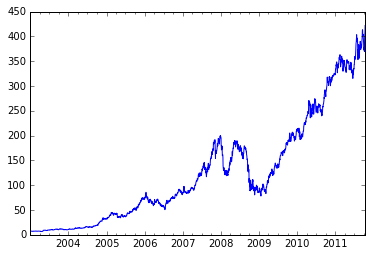

In [242]:
close_px['AAPL'].plot()

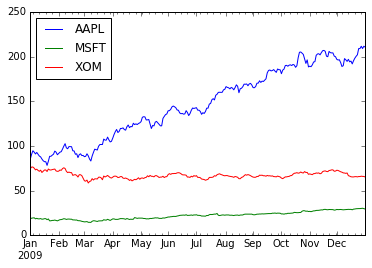

In [243]:
close_px.ix['2009'].plot()

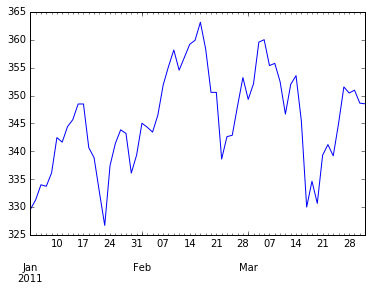

In [244]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

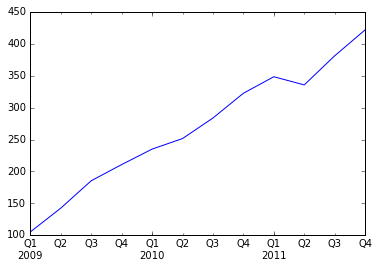

In [246]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.ix['2009':].plot()

## Moving Window Functions

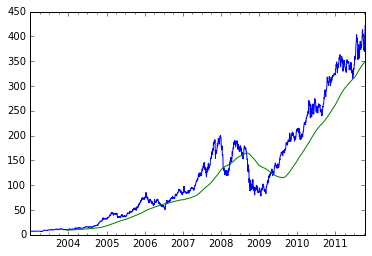

In [252]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window=250,center=False).mean().plot()

In [255]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10,center=False).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

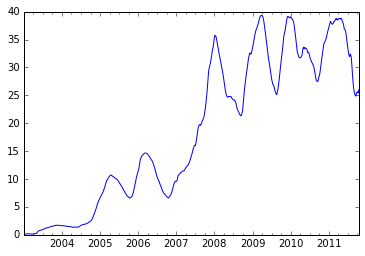

In [256]:
appl_std250.plot()

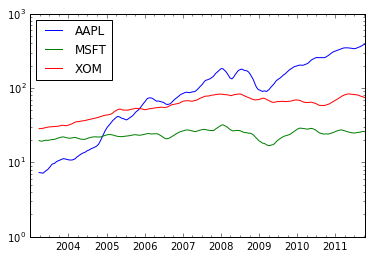

In [257]:
expanding_mean = lambda x: x.rolling(len(x), min_periods=1).mean()
close_px.rolling(60).mean().plot(logy=True)

### Exponentially weighted functions

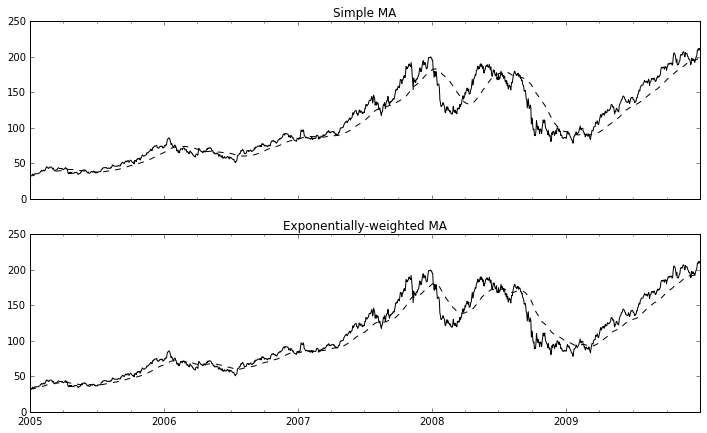

In [260]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(window= 60, min_periods=50,center=False).mean()
ewma60 = aapl_px.ewm(ignore_na=False, span=60,min_periods=0,adjust=True).mean()
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary Moving window function

In [269]:
close_px
spx_px = close_px_all['SPX']

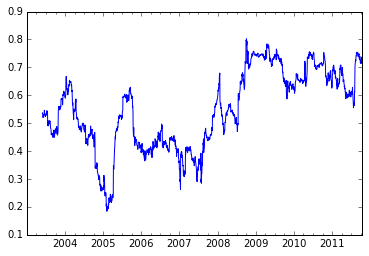

In [275]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(window=125, min_periods=100).corr(other=spx_rets)
corr.plot()

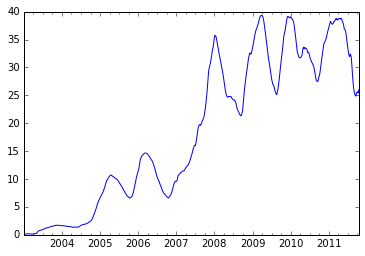

In [266]:
plt.figure()
appl_std250 = close_px.AAPL.rolling(window=250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

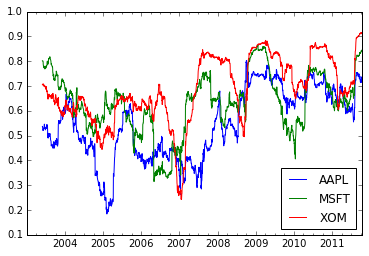

In [276]:
corr = returns.rolling(window= 125, min_periods=100).corr(other=spx_rets)
corr.plot()


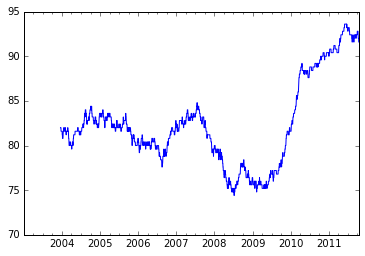

In [277]:
### User-defined moving window functions
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(window=250, center=False).apply(func=score_at_2percent)
result.plot()

## Performance and  Memory Usage Notes


In [273]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -1.561807
2000-01-01 00:00:00.010   -0.158253
2000-01-01 00:00:00.020    0.571679
2000-01-01 00:00:00.030   -0.123102
2000-01-01 00:00:00.040   -1.746971
2000-01-01 00:00:00.050   -0.484904
                             ...   
2000-01-02 03:46:39.940    0.557282
2000-01-02 03:46:39.950    1.023749
2000-01-02 03:46:39.960   -0.737738
2000-01-02 03:46:39.970    0.510068
2000-01-02 03:46:39.980   -0.216247
2000-01-02 03:46:39.990   -0.307956
Freq: 10L, dtype: float64

In [278]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [279]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 179 ms per loop


In [280]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

1 loop, best of 3: 246 ms per loop
